<a href="https://colab.research.google.com/github/feroz2017/deep-learning/blob/main/ann_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
import torch.nn as nn


import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

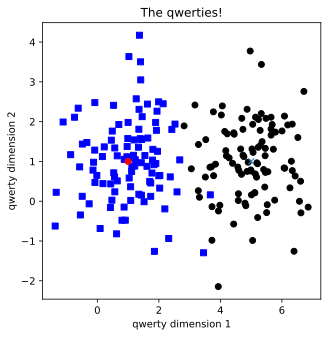

In [3]:

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')

plt.plot(A[0],A[1], 'ro')
plt.plot(B[0],B[1], 'x')

plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()




In [4]:
print(data.shape)
print(labels.shape)

torch.Size([200, 2])
torch.Size([200, 1])


In [57]:
AnnQwerties = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.Sigmoid()
)

In [58]:
print(AnnQwerties)

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
  (3): Sigmoid()
)


In [59]:
criterion = nn.BCELoss()
learning_rate = 2

In [60]:
optimizer = torch.optim.SGD(AnnQwerties.parameters(), lr=learning_rate)

In [67]:
number_of_epochs = 1000

losses = torch.zeros(number_of_epochs)
accuracies = torch.zeros(number_of_epochs)

for epoch in range(number_of_epochs):
  # fwd
  y_hat = AnnQwerties(data)

  # calculating the accuracy for learning
  prediction = (y_hat > 0.5).float()
  accuracy = (prediction == labels).float().mean()
  accuracies[epoch] = accuracy

  #loss
  loss = criterion(y_hat, labels)
  losses[epoch] = loss


  #backward
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

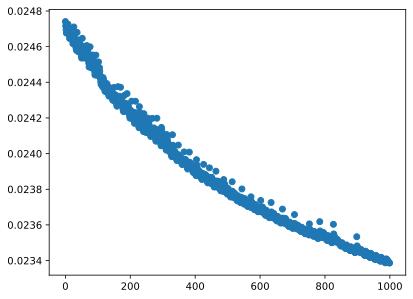

In [70]:
plt.plot(losses.detach(),'o')
preds = AnnQwerties(data)
misclassified = preds.squeeze() != labels.squeeze()
print(misclassified)

In [63]:
predictions = AnnQwerties(data)

print(data[:3])

tensor([[0.4349, 0.4353],
        [1.4035, 3.5039],
        [2.1391, 2.4499]])


In [65]:
print(predictions[:5])

i = (predictions > 0.5).float()


print(i[0:5])

tensor([[5.1017e-20],
        [3.4363e-07],
        [1.1315e-03],
        [2.6080e-16],
        [9.0783e-18]], grad_fn=<SliceBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])
